# Prosper Exploratory Analysis

##  Wrangling

This document explores a dataset containing 113,937  loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. Most variables are numeric and categorical in nature.
The dataset features can be split into two main categories:

- Borrower information
- Loan performance information

The independent variables of interest are:
ProsperScore,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,
OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,LoanOriginalAmount`


### What is/are the main feature(s) of interest in your dataset?

Focusing on figuring out what features are best for predicting Prosper's loan statuses.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


The present analysis will investigate a group of borrowers features along with the type of the listing/loan will be analyzed to correctly understand which factors likely impact Prosper's final loan status. 

The features listed in the previous section will be subject of this analysis. However, we do understand that it isn't exhaustive and additional features may be required, as well as a deeper business understanding and history of decisions made by Prosper top management.
#### Features of interest

In [4]:
# Define features of interest for this analysis
features = ['ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', \
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', \
            'IncomeVerifiable', 'LoanOriginalAmount', 'LoanStatus']

In [5]:
# Look at the dataset
loan_df[features].sample(5)

,ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,LoanOriginalAmount,LoanStatus
9377,7.0,1,Employed,186.0,True,13.0,8,0.20,True,12500,Current
72944,5.0,1,Employed,16.0,False,5.0,1,0.15,True,3500,Completed
88112,NaN,0,Full-time,161.0,True,14.0,12,0.06,True,25000,Completed
20247,10.0,13,Employed,121.0,False,3.0,2,0.48,True,2000,Current
97741,5.0,1,Employed,26.0,True,13.0,5,0.18,True,7000,Current


In [6]:
# Check unique LoanStatus
loan_df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [7]:
# Check unique Employment Status
loan_df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [8]:
# Fill nan values with 'Not available'
loan_df['EmploymentStatus'].fillna(value='Not available', inplace=True)

In [9]:
# Define EmploymentStatus as a category
employment_status_dict = ['Not available', 'Other', 'Not employed', 'Self-employed', 
                                               'Part-time', 'Full-time', 'Employed', 'Retired']

ordered_employment_status = pd.api.types.CategoricalDtype(ordered = True, categories = employment_status_dict)
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype(ordered_employment_status)

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: `LoanStatus`. Let's plot this variable to have an idea of its distribution.

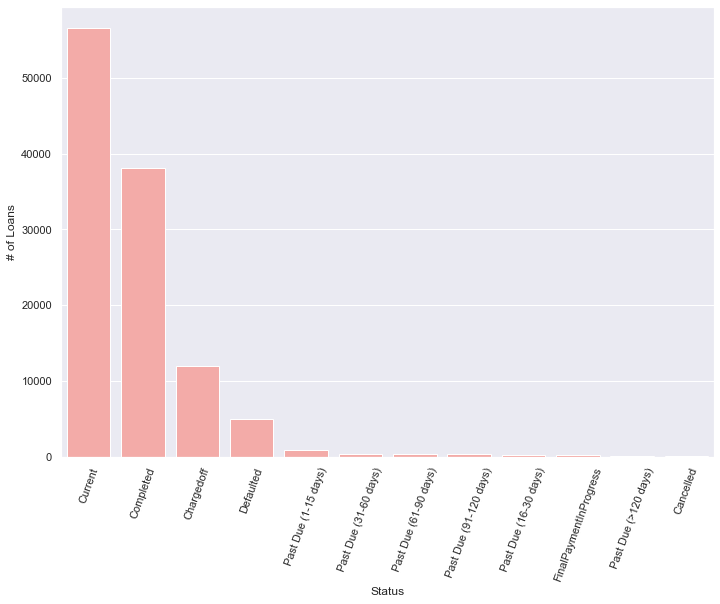

In [10]:
# Plot LoanStatus
default_color = sb.color_palette("pastel")[3]

sb.set(rc={'figure.figsize':(11.69, 8.27)})
plt.xticks(rotation=70)
# Order the categorical variable type
cat_order = loan_df['LoanStatus'].value_counts().index

sb.countplot(data = loan_df, x = 'LoanStatus', color = default_color, order=cat_order)
plt.ylabel('# of Loans')
plt.xlabel('Status');

In [11]:
# Group all Past Due loans under an unique status
loan_df['LoanStatus'] = loan_df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(ordered_loan_status)


In [12]:
# Check the percentage of loans in each status
pct_loans_by_status = pd.DataFrame(loan_df.groupby('LoanStatus')['LoanStatus'].count())
pct_loans_by_status['PctLoans'] = (pct_loans_by_status['LoanStatus']/pct_loans_by_status['LoanStatus'].sum())*100
pct_loans_by_status.sort_values(by='PctLoans', ascending=False)

,LoanStatus,PctLoans
LoanStatus,,
Current,56576,49.657691
Completed,38074,33.418179
Chargedoff,11992,10.525577
Defaulted,5018,4.404382
Past Due,2067,1.814240
FinalPaymentInProgress,205,0.179932


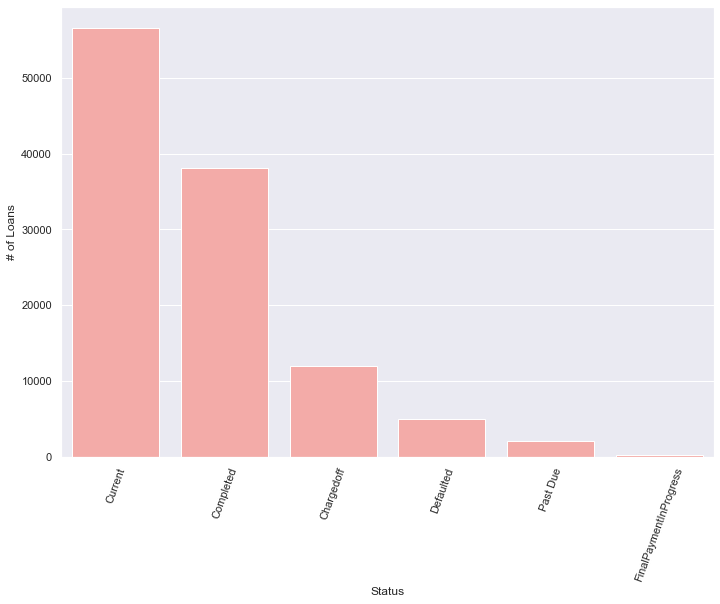

In [13]:
plt.figure(figsize=[ 11.69, 8.27])
plt.xticks(rotation=70)
# Order the categorical variable type
cat_order = loan_df['LoanStatus'].value_counts().index

sb.countplot(data = loan_df, x = 'LoanStatus', color = default_color, order=cat_order)
plt.ylabel('# of Loans')
plt.xlabel('Status');

**80% of the loans are in current or completed state, where as more than 10 % are is charged off stage.
4% in defaulted and 1% in past due (all grouped together**

further lets see the employment status of borrowers.

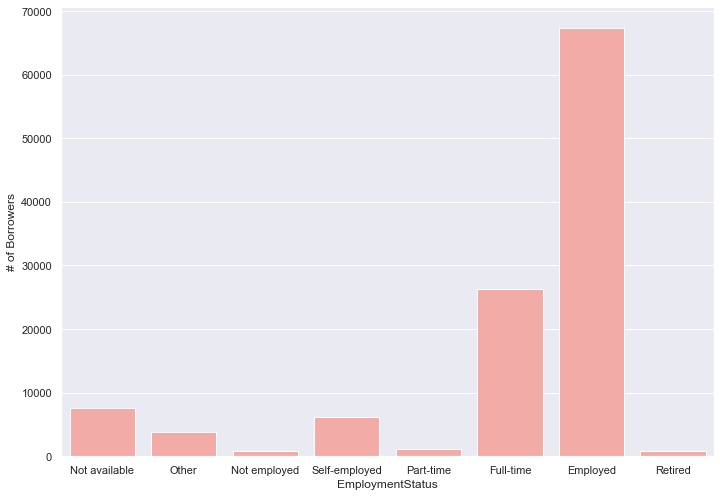

In [14]:
# Plot for employment status

plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = loan_df, x = 'EmploymentStatus', color = default_color)
plt.xlabel('EmploymentStatus')
plt.ylabel('# of Borrowers');

In [15]:
pct_loans_by_Estatus = pd.DataFrame(loan_df.groupby('EmploymentStatus')['EmploymentStatus'].count())
pct_loans_by_Estatus['PctESLoans'] = (pct_loans_by_Estatus['EmploymentStatus']/pct_loans_by_Estatus['EmploymentStatus'].sum())*100
pct_loans_by_Estatus.sort_values(by='PctESLoans', ascending=False)

,EmploymentStatus,PctESLoans
EmploymentStatus,,
Employed,67322,59.087039
Full-time,26355,23.131204
Not available,7602,6.672108
Self-employed,6134,5.383677
Other,3806,3.340443
Part-time,1088,0.954914
Not employed,835,0.732861
Retired,795,0.697754


Analyzing the distribution of all Prosper's Employment status we notices that almost 60 % borrows are employed , 23 % are full time and all other are less than 7%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

One feature got my attention during the univariate analyses: *Loan Status*.

Regarding loan status, we can observe that there are different past due categories with very few loans, about 1.81%. So, I decided to consolidate all under a single category called Past Due.

## Bivariate Exploration

To start off with, we will look at the pairwise correlations present between features in the data. 

In [16]:
# Numberical vs Categorical features
numeric_vars = ['ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'ListingCategory','EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable']

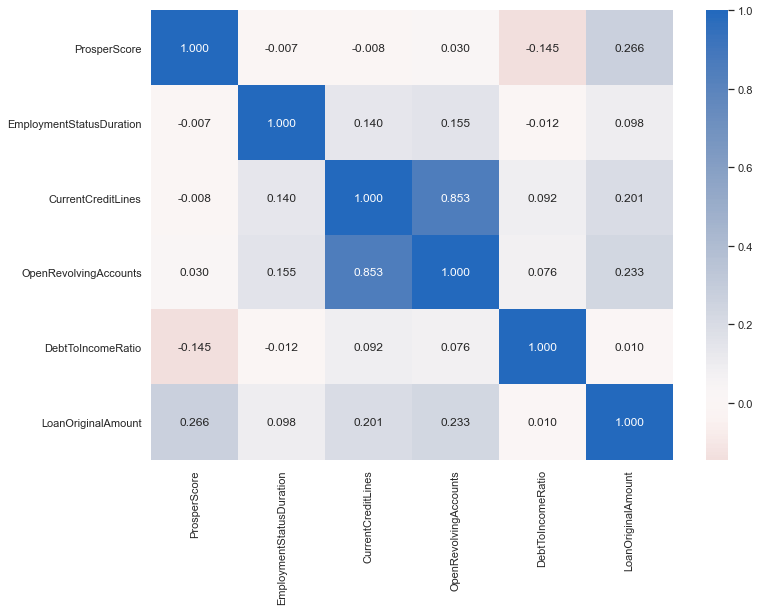

In [17]:
# Correlation plot
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(loan_df[['ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**There is a strong correlation between OpenRevolvingAccounts and CurrentCreditLines**

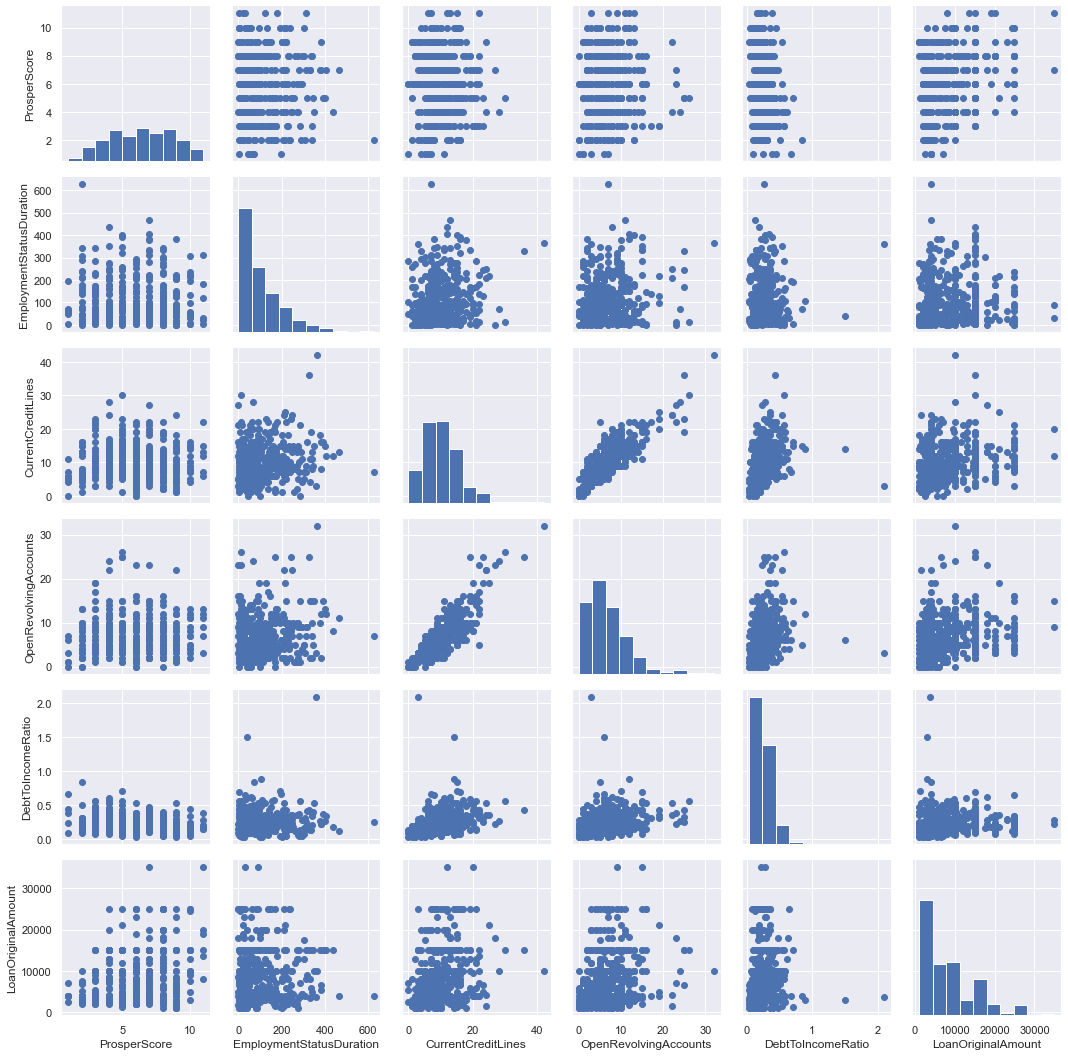

In [18]:
# Plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = np.random.choice(loan_df.shape[0], 500, replace = False)
loan_samples = loan_df.loc[samples,features]

g = sb.PairGrid(data = loan_samples, vars = numeric_vars)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

**again there is a strong correlation between OpenRevolvingAccounts and CurrentCreditLines**

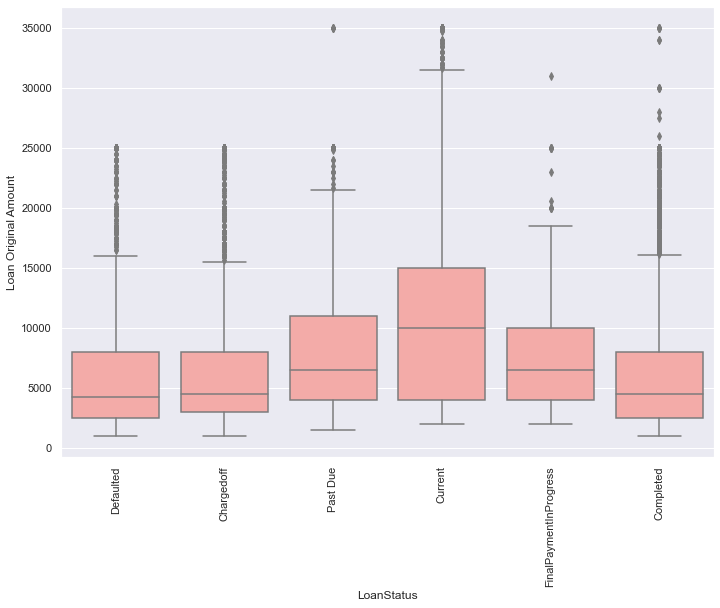

In [22]:
# LoanStatus vs LoanOriginalAmount
plt.figure(figsize=[ 11.69, 8.27])
default_color = sb.color_palette('pastel')[3]

ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', color = default_color)
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=90);

Looking at completed, charged-off, and defaulted loans, we cannot observe differences between their median original loan amount. However, current loans amount are bigger than the other.

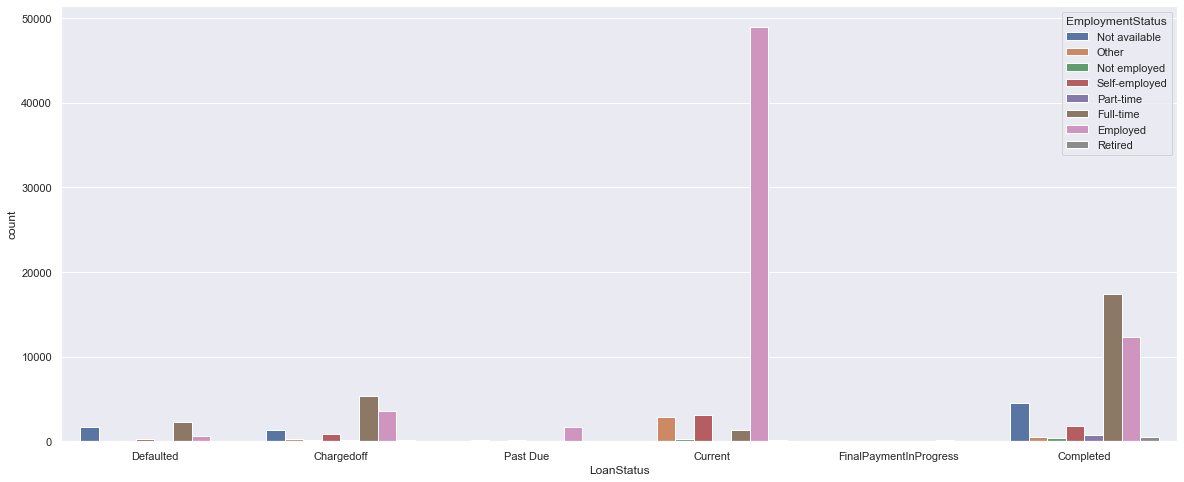

In [20]:
# LoanStatus vs EmploymentStatus
plt.figure(figsize = [20, 8])

sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'EmploymentStatus');

Surprisily, borrowers how are employed and have full-time jobs have most of the defaulted and charged-off loans.

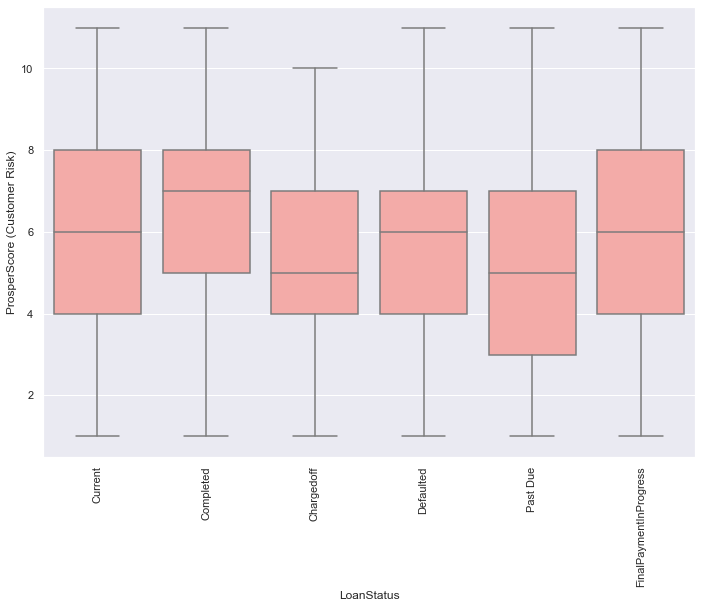

In [23]:
# LoanStatus vs ProsperScore
plt.figure(figsize=[ 11.69, 8.27])
default_color = sb.color_palette('pastel')[3]

ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='ProsperScore', color = default_color, order=cat_order)
plt.ylabel('ProsperScore (Customer Risk)')
plt.xticks(rotation=90);

borrowers with higher prosper score completed their loans

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The original loan amount had amazing relation with the chosen variable of interest during the bivariate exploratory study.

Additionally, current loans have a higher original loan amount than the other statuses. Here, I would recommend further investigation alongside Prosper's business analysts.

Surprisily, borrowers how are employed and have full-time jobs have most of the defaulted and charged-off loans and borrowers with higher prosper score completed their loans
 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Besides this relationship, we also notice that a higher number of current credit lines led to a higher number of revolving accounts, which is an expected find.
Surprisily, borrowers how are employed and have full-time jobs have most of the defaulted and charged-off loans.

## Multivariate Exploration

To finalize this exploratory analysis, it would be interesting to verify if the duration of borrowers employment status are related with the loan status. 

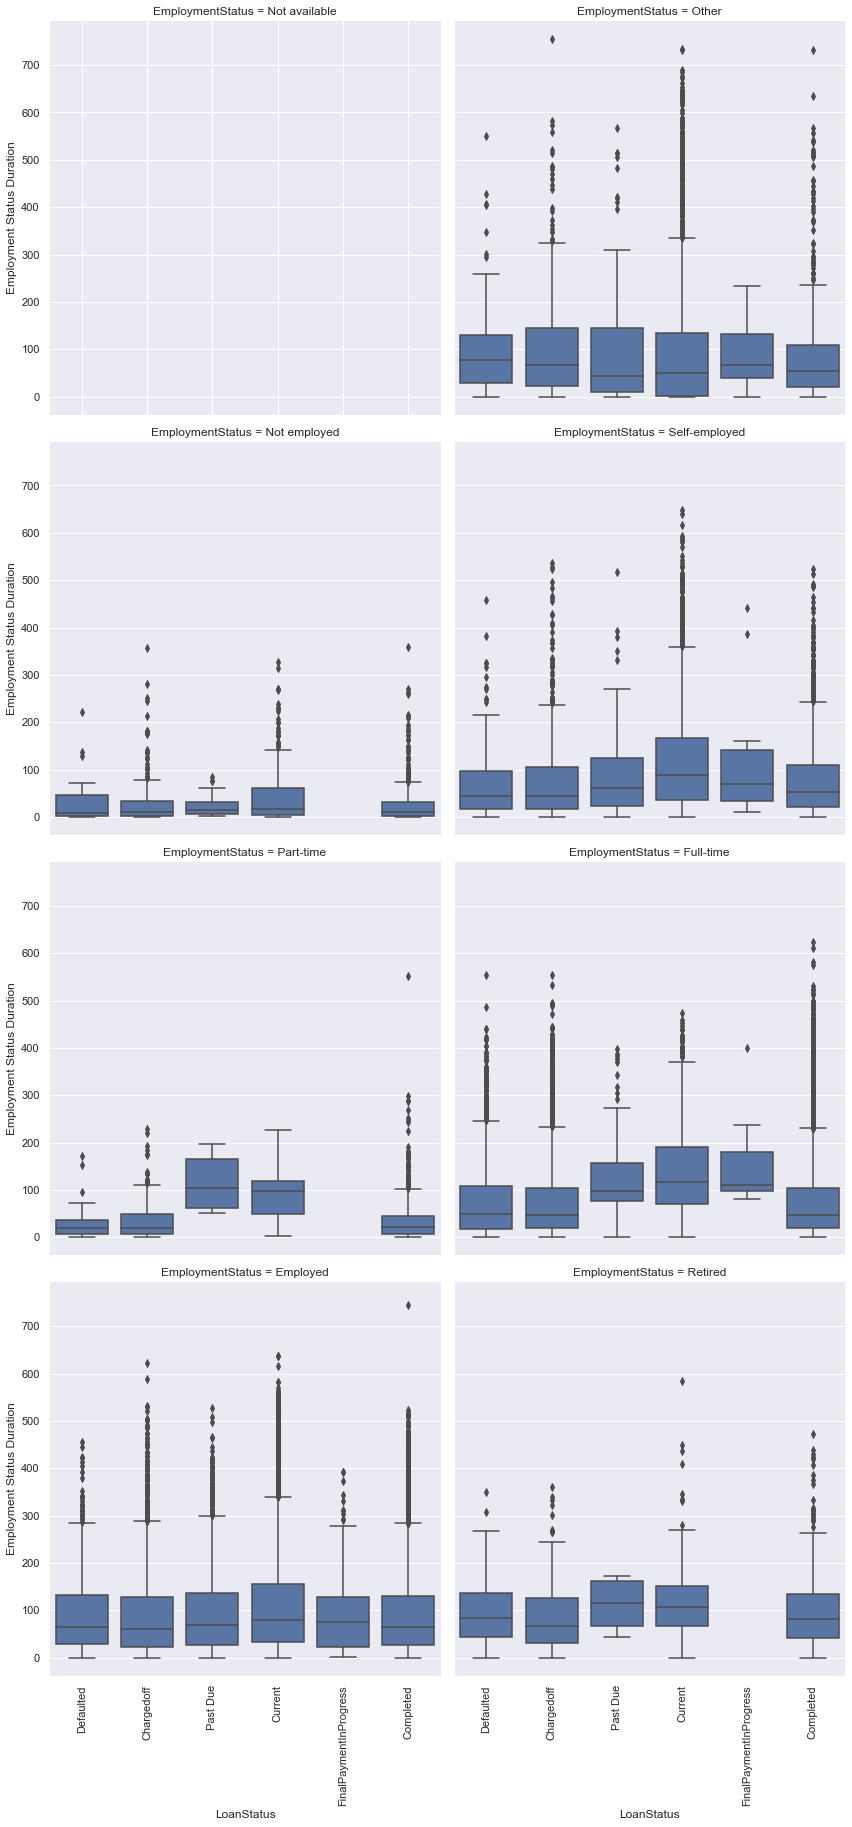

In [21]:
# LoanStatus vs EmploymentStatus vs EmploymentStatusDuration: create faceted heat maps on levels of the color variable
valid_employment = loan_df[loan_df['EmploymentStatus'] != 'Not available'][['LoanStatus', 'EmploymentStatus', 'EmploymentStatusDuration']]

g = sb.FacetGrid(data = valid_employment, col = 'EmploymentStatus', col_wrap = 2, size = 6, dropna=True, legend_out=True, )
g.map(sb.boxplot, 'LoanStatus', 'EmploymentStatusDuration')
g.set_xlabels()
g.set_ylabels('Employment Status Duration')
g.set_xticklabels(rotation=90)

plt.show()

Looking at the employment status duration, we noticed that non-employed borrowers have more current loans than loans in the remaining statuses, which is expected. Additionally, clients who have part-time jobs for longer also have more past due loans. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this multivariate analysis, I expected to find those non-employed borrowers for a long time would have more charged-off and defaulted loans than the working ones. Which I couldn't observe during this analysis.

### Were there any interesting or surprising interactions between features?

I expected a higher contribution of some statuses, such as non-employed borrowers and debt to income ratio, on charged-off and defaulted loans. The failure to confirm these may be an indicator that Prosper's risk analysts are doing a great job preventing business loss.